In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, f_oneway



# Part 1

In [3]:
heartTraindf = pd.read_csv("Part1_dataset/heart-train.csv")
heartTestdf = pd.read_csv("Part1_dataset/heart-test.csv")

### 1. Identify the dataset columns into nominal, categorical, continuous, etc. categories

In [4]:
heartTraindf.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
3,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
4,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


In [5]:
heartTraindf.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

By observing the values of each columns, we could conclude as below:

sbp (Systolic blood pressure):
 - Datatype: Continuous

tobacco (Cumulative tobacco consumption, in kg):
 - Datatype: Continuous

ldl (Low-density lipoprotein cholesterol):
  - Datatype: Continuous

adiposity (Adipose tissue concentration):
  - Datatype: Continuous

famhist (Family history of heart disease; 1=Present, 0=Absent):
  - Datatype: Nominal

typea (Score on a test designed to measure type-A behavior):
  - Datatype: Continuous

obesity (Obesity):
  - Datatype: Continuous

alcohol (Current consumption of alcohol):
  - Datatype: Continuous

age (Age of subject):
  - Datatype: Continuous

chd (Coronary heart disease; 1=Yes, 0=No):
  - Datatype: Nominal


_In the case of `Age` column, it sometimes considered as discrete variable. However, in this analysis, we considered it to be continouous variable._ 

### 2. Present insights about the data.

In [6]:
# general statistics for all the coninous columns.

heartTraindf.iloc[:,:-1].describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,139.240291,3.666262,4.589539,25.151214,52.135922,25.802112,18.030073,42.686893
std,20.451903,4.518501,1.883744,7.740794,9.592727,4.081745,25.298909,15.129338
min,101.000000,0.000000,0.980000,6.740000,20.000000,17.890000,0.000000,15.000000
25%,125.500000,0.037500,3.240000,19.397500,46.000000,22.737500,0.447500,30.750000
50%,136.000000,1.805000,4.225000,26.090000,52.000000,25.635000,7.510000,45.000000
75%,148.000000,5.850000,5.527500,30.755000,58.000000,28.167500,24.960000,57.000000
max,218.000000,27.400000,14.160000,42.490000,73.000000,45.720000,145.290000,64.000000


In [7]:
print(heartTraindf['famhist'].value_counts())
print(heartTraindf['chd'].value_counts())

Absent     239
Present    173
Name: famhist, dtype: int64
0    275
1    137
Name: chd, dtype: int64


_**Insight**_



#### Insights from Simple Statistics:
sbp (Systolic Blood Pressure):
 - The average systolic blood pressure is around 139.24 with a standard deviation of 20.45.
 - The minimum blood pressure recorded is 101, and the maximum is 218.

tobacco (Cumulative Tobacco Consumption):
 - The average cumulative tobacco consumption is approximately 3.67 kg, with a standard deviation of 4.52.
 - There is a wide range of tobacco consumption, from 0 to 27.4 kg.

ldl (Low-Density Lipoprotein Cholesterol):
 - The average LDL cholesterol level is around 4.59, with a standard deviation of 1.88.
 - The minimum LDL cholesterol level is 0.98, and the maximum is 14.16.

adiposity (Adipose Tissue Concentration):
 - The average adiposity is 25.15, with a standard deviation of 7.74.
 - Adiposity ranges from 6.74 to 42.49.

typea (Type-A Behavior Score):
 - The average type-A behavior score is 52.14, with a standard deviation of 9.59.
 - Scores range from 20 to 73.

obesity:
 - The average obesity level is 25.80, with a standard deviation of 4.08.
 - Obesity levels range from 17.89 to 45.72.

alcohol (Alcohol Consumption):
 - The average alcohol consumption is 18.03, with a wide standard deviation of 25.30.

Some individuals have very high alcohol consumption, as indicated by the maximum value of 145.29.
age:
 - The average age is 42.69, with a standard deviation of 15.13.
 - Age ranges from 15 to 64.

#### Insights from Value Counts:
famhist (Family History of Heart Disease):
 - 239 individuals have no family history of heart disease (Absent), while 173 have a family history (Present).

chd (Coronary Heart Disease):
 - 275 individuals do not have coronary heart disease (chd=0), while 137 individuals have coronary heart disease (chd=1).

### 3. Find the number of null values for each column

In [8]:
heartTraindf.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [9]:
heartTestdf.isnull().sum()

ID           0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64

There are no null values in any columns.

### 4. Know about the patients:

#### a. Find the oldest person

In [10]:

# Find the oldest age in the train data
print(f"The oldest age is : {heartTraindf['age'].max()}")

# Filter the data with that has age == 64
heartTraindf[heartTraindf['age']==64]

The oldest age is : 64


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
58,158,3.60,2.97,30.11,Absent,63,26.64,108.00,64,0
70,152,12.18,4.04,37.83,Present,63,34.57,4.17,64,0
110,126,0.00,5.98,29.06,Present,56,25.39,11.52,64,1
167,148,8.20,7.75,34.46,Present,46,26.53,6.04,64,1
170,128,5.16,4.90,31.35,Present,57,26.42,0.00,64,0
206,140,8.60,3.90,32.16,Present,52,28.51,11.11,64,1
241,160,0.60,6.94,30.53,Absent,36,25.68,1.42,64,0
256,138,2.00,5.11,31.40,Present,49,27.25,2.06,64,1
276,128,0.73,3.97,23.52,Absent,54,23.81,19.20,64,0
348,140,8.60,3.90,32.16,Present,52,28.51,11.11,64,1


64 years old is the oldest age in this data and the table above shows the data of oldest people in heart-train data. There are total 12 people who are 64 years old. 

#### b. Find the youngest person

In [11]:
# Find the youngest age
print(f"The youngest age is : {heartTraindf['age'].min()}")

# Filter the data with age == 15
heartTraindf[heartTraindf['age']==15]

The youngest age is : 15


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
9,132,0.0,1.87,17.21,Absent,49,23.63,0.97,15,0
38,118,0.0,3.67,12.13,Absent,51,19.15,0.60,15,0


15 years old is the youngest age in this data and the table above shows the data of the youngest people in the dataframe. Total of 2 people. 

#### c. Find the average age group

In [12]:
# Find the average age 
print("The Average age is : {:.2f}".format(heartTraindf['age'].mean()))

# Filter the average group

The Average age is : 42.69


In [13]:
average_age = 42.69
std_age = 15.13

# Define the age range for filtering (e.g., within one standard deviation from the mean)
lower_age_limit = average_age - std_age
upper_age_limit = average_age + std_age

# Filter the DataFrame for individuals in the average age group
heartTraindf[(heartTraindf['age'] >= lower_age_limit) & (heartTraindf['age'] <= upper_age_limit)]



,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
4,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
5,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1
...,...,...,...,...,...,...,...,...,...,...
403,124,4.25,8.22,30.77,Absent,56,25.80,0.00,43,0
406,106,1.08,4.37,26.08,Absent,67,24.07,17.74,28,1
407,146,3.60,3.51,22.67,Absent,51,22.29,43.71,42,0
408,206,0.00,4.17,33.23,Absent,69,27.36,6.17,50,1


By calculating the summary statistic in **question 2**, we could get the value for average and standard deviation of age column. Thus, since the question is asking the average **group**, we need to calculate the average age range by using standard deviation. Here we set the range by one standard deviation from the mean. The table above shows the group of people in average age range. There are  228 people total. 

#### d. Find median age

In [14]:
print(f"The medain age is : {heartTraindf['age'].median()}")

The medain age is : 45.0


#### e. Find the relationship between the deaths and ages(the class column is your prediction variable)

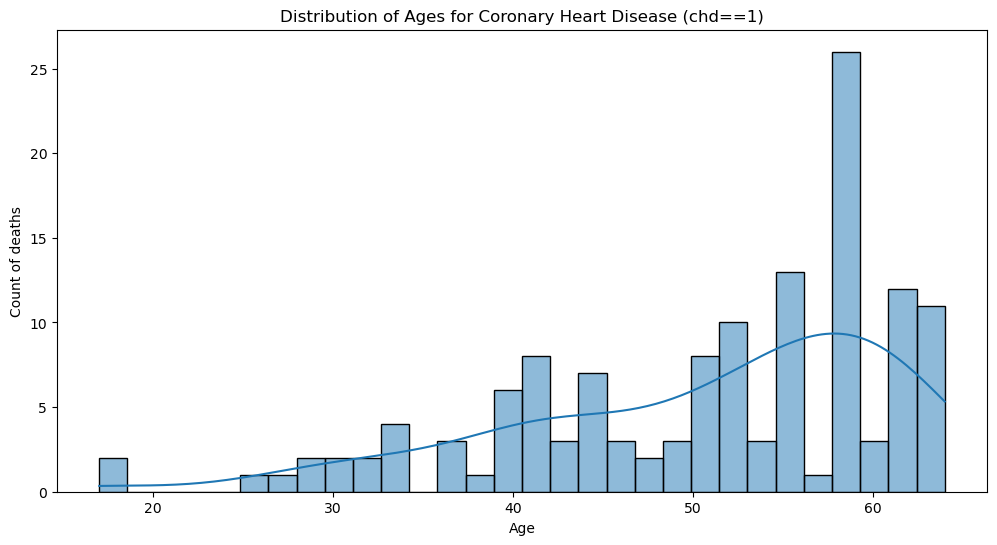

In [15]:
chd_1_data = heartTraindf[heartTraindf['chd'] == 1]

# Plotting the distribution of ages for chd==1
plt.figure(figsize=(12, 6))
sns.histplot(data=chd_1_data, x='age', bins=30, kde=True)
plt.title('Distribution of Ages for Coronary Heart Disease (chd==1)')
plt.xlabel('Age')
plt.ylabel('Count of deaths')
plt.show()

To find a relationship between deaths and ages, we first filtered data that are `chd == 1`, which indicates the dead. Then, we drew a histogram graph to get the insight for the distribution between number of deaths and ages. By observing the histogram above, we could infer that as the age gets older, the number of deaths also increase. The left skewed line shows the number of deaths are more focused on the age group of between 55 years old to 60 years old. 

#### f. Find the age groups whose survival rate is the largest

In [16]:
bins = [29, 39, 49, 59, 69, 79, 89]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
heartTraindf['age_group'] = pd.cut(heartTraindf['age'], bins=bins, labels=labels, right=False)

# Calculate the survival rate for each age group
survival_rates = heartTraindf.groupby('age_group')['chd'].mean()

# Find the age group(s) with the largest survival rate
max_survival_rate_age_group = survival_rates.idxmax()

print(f"The age group with the largest survival rate is: {max_survival_rate_age_group}")


The age group with the largest survival rate is: 50-59


# Part 2

### 1. Load the dataset and perform initial data exploration. (Need more explanation)

In [17]:
pricedf = pd.read_csv("Part2_dataset/Price.csv")

In [19]:
pricedf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### 2. Identify the types of variables present and categorize them (Need more explanation)

In [37]:
pricedf.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [76]:
numerical_features = pricedf.select_dtypes(include=['float64', 'int64'])
categorical_features = pricedf.select_dtypes(include=['object'])

print(f"numrical_features are : {numerical_features.columns}")
print(f"categorical_features are : {categorical_features.columns}")

numrical_features are : Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')
categorical_features are : Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')


The above information shows the different data types of each column in Price.csv dataset. By looking deeper into the values of each column, we can categorize them as:

**Numerical Values**
- Continuous Variables: `price`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`
- Disecrete Variables: `bedrooms`, `bathrooms`, `floors`

**Categorical Variables**
- `waterfront`, `view`, `condition`

**Date variable**

### 3. Obtain insights about the data.

### 4. Find the number of missing values for each column

In [41]:
pricedf.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

We can notify that there are no missing values for each column

### 5. Calculate summary statistics for numerical columns, such as mean, median, standard deviation, etc

In [45]:
pd.set_option('display.float_format', '{:.3f}'.format)
pricedf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000
mean,551962.988,3.401,2.161,2139.347,14852.516,1.512,0.007,0.241,3.452,1827.265,312.082,1970.786,808.608
std,563834.703,0.909,0.784,963.207,35884.436,0.538,0.084,0.778,0.677,862.169,464.137,29.732,979.415
min,0.000,0.000,0.000,370.000,638.000,1.000,0.000,0.000,1.000,370.000,0.000,1900.000,0.000
25%,322875.000,3.000,1.750,1460.000,5000.750,1.000,0.000,0.000,3.000,1190.000,0.000,1951.000,0.000
50%,460943.462,3.000,2.250,1980.000,7683.000,1.500,0.000,0.000,3.000,1590.000,0.000,1976.000,0.000
75%,654962.500,4.000,2.500,2620.000,11001.250,2.000,0.000,0.000,4.000,2300.000,610.000,1997.000,1999.000
max,26590000.000,9.000,8.000,13540.000,1074218.000,3.500,1.000,4.000,5.000,9410.000,4820.000,2014.000,2014.000


### 6. Analyze the distribution of the numerical feature “price” using a distribution plot such as a histogram.

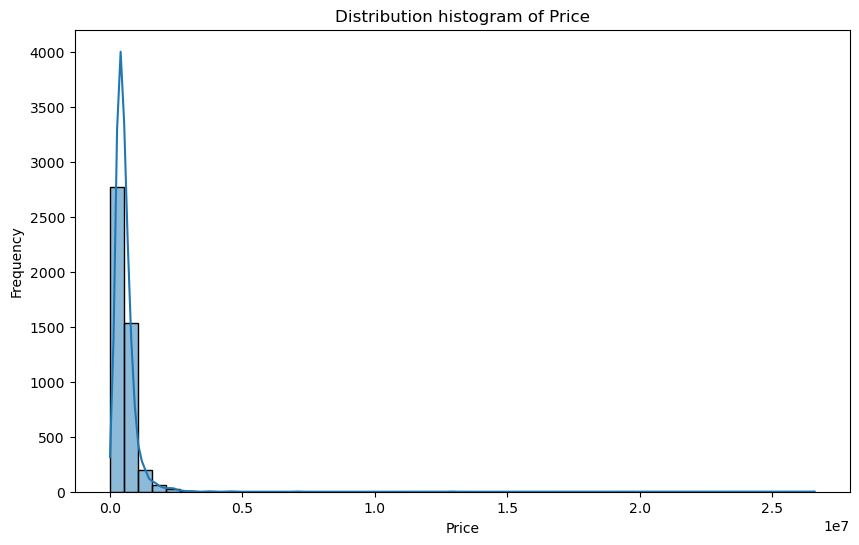

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(pricedf['price'], bins=50, kde=True)
plt.title('Distribution histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### 7. Observe the histogram, Does it look like it falls under any probability distribution? Does it look like a bell curve?

Since the histogram is extremely skewed to right, we cannot say that this histogram is following the normal distribution. Thus, **it is not a bell curve**. The extremely right skewed distribution is occurred because most of the price are bounded to the lower limit while there are some price values that are extremely expensive. Therefore, we can assume that the price values in this dataset falls under **Exponential distribution**

### 8. Use the Shapiro-Wilk test to do a normality test and check if the “price” feature follows  the normal distribution (if the p-value is greater than 0.05 then the feature follows the  Normal distribution) 


In [52]:
# Filter the column
price_data = pricedf['price']

# Perform Shapiro test
statistic, p_value = shapiro(price_data)
alpha = 0.05

# Print the results
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpret the results based on the p-value and alpha level
if p_value > alpha:
    print("The 'price' feature follows a normal distribution (fail to reject the null hypothesis)")
else:
    print("The 'price' feature does not follow a normal distribution (reject the null hypothesis)")

Statistic: 0.3806491494178772, p-value: 0.0
The 'price' feature does not follow a normal distribution (reject the null hypothesis)


### 9.Consider the Hypothesis "The year built has a significant impact on sale price.”. Do a hypothesis test using a t-test: split into two groups: properties built before 1990 and those built-in or after 1990. (alpha/confidence interval= 95%

In [56]:
# Split the dataset by two group
before_1990 = pricedf[pricedf['yr_built'] < 1990]['price']
after_1990 = pricedf[pricedf['yr_built'] >= 1990]['price']

In [67]:
t_statistic, p_value = ttest_ind(before_1990, after_1990)

# Print the results
print("Independent t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results based on the p-value and alpha level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The year built has a significant impact on sale price.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of the year built on sale price.")

Independent t-test results:
T-statistic: -5.014550457612197
P-value: 5.51579911487353e-07
Reject the null hypothesis: The year built has a significant impact on sale price.


### 10. Consider the Hypothesis "The year built has a significant impact on sale price.Do a Hypothesis test using ANOVA: Assume that you have 3 groups: groupA has all houses built in 1990, groupB has all houses that were built in 2000 and groupC has all houses built in 2010 (alpha/confidence interval = 95%)

In [70]:

# Create three groups based on the year built
price_1990 = pricedf[pricedf['yr_built'] == 1990]['price']
price_2000 = pricedf[pricedf['yr_built'] == 2000]['price']
price_2010 = pricedf[pricedf['yr_built'] == 2010]['price']

# Perform ANOVA
statistic, p_value = f_oneway(price_1990, price_2000, price_2010)

# Set the significance level
alpha = 0.05

# Print the results
print(f'ANOVA statistic: {statistic}, p-value: {p_value}')

# Check the result
if p_value < alpha:
    print("Reject the null hypothesis: The year built has a significant impact on sale price.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of the year built on sale price.")


ANOVA statistic: 4.286625058295787, p-value: 0.015547293538959776
Reject the null hypothesis: The year built has a significant impact on sale price.


### 11. Does the ANOVA conclusion change from the t-test or is it the same?

The ANOVA conclusion and t-test both showed the **same result** which was rejecting the null hypothesis. Thus we could conclude that the year build has a significant impact on sale price

### 12. Calculate the covariance matrix of the numerical features present in the dataset.

In [80]:
cov_matrix = numerical_features.cov()
print("Covariance Matrix:")
cov_matrix

Covariance Matrix:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,317909571796.423,102660.350,144557.386,233751158.982,1020775521.907,45969.211,6455.473,100288.560,13331.964,178683224.622,55067934.360,366404.580,-15889609.883
bedrooms,102660.350,0.826,0.389,520.767,2244.440,0.087,-0.000,0.079,0.015,379.806,140.961,3.850,-54.371
bathrooms,144557.386,0.389,0.614,574.628,3032.988,0.205,0.005,0.129,-0.064,466.214,108.414,10.801,-165.724
sqft_living,233751158.982,520.767,574.628,927767.563,7277079.993,178.799,9.562,233.184,-40.982,727839.770,199927.792,8241.284,-115862.844
sqft_lot,1020775521.907,2244.440,3032.988,7277079.993,1287692757.431,72.431,52.219,2064.409,13.563,6696770.889,580309.104,54099.139,-798873.488
floors,45969.211,0.087,0.205,178.799,72.431,0.290,0.001,0.013,-0.100,242.636,-63.836,7.482,-123.364
waterfront,6455.473,-0.000,0.005,9.562,52.219,0.001,0.007,0.024,0.000,5.742,3.820,-0.059,0.713
view,100288.560,0.079,0.129,233.184,2064.409,0.013,0.024,0.606,0.033,116.994,116.190,-1.492,17.510
condition,13331.964,0.015,-0.064,-40.982,13.563,-0.100,0.000,0.033,0.459,-104.046,63.064,-8.048,-123.915
sqft_above,178683224.622,379.806,466.214,727839.770,6696770.889,242.636,5.742,116.994,-104.046,743335.345,-15495.574,10472.341,-135466.687


In [92]:
numerical_features

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.000,3,1.500,1340,7912,1.500,0,0,3,1340,0,1955,2005
1,2384000.000,5,2.500,3650,9050,2.000,0,4,5,3370,280,1921,0
2,342000.000,3,2.000,1930,11947,1.000,0,0,4,1930,0,1966,0
3,420000.000,3,2.250,2000,8030,1.000,0,0,4,1000,1000,1963,0
4,550000.000,4,2.500,1940,10500,1.000,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.667,3,1.750,1510,6360,1.000,0,0,4,1510,0,1954,1979
4596,534333.333,3,2.500,1460,7573,2.000,0,0,3,1460,0,1983,2009
4597,416904.167,3,2.500,3010,7014,2.000,0,0,3,3010,0,2009,0
4598,203400.000,4,2.000,2090,6630,1.000,0,0,3,1070,1020,1974,0


### 13. Create a heatmap of the covariance matrix. What do the colors in the heatmap represent?

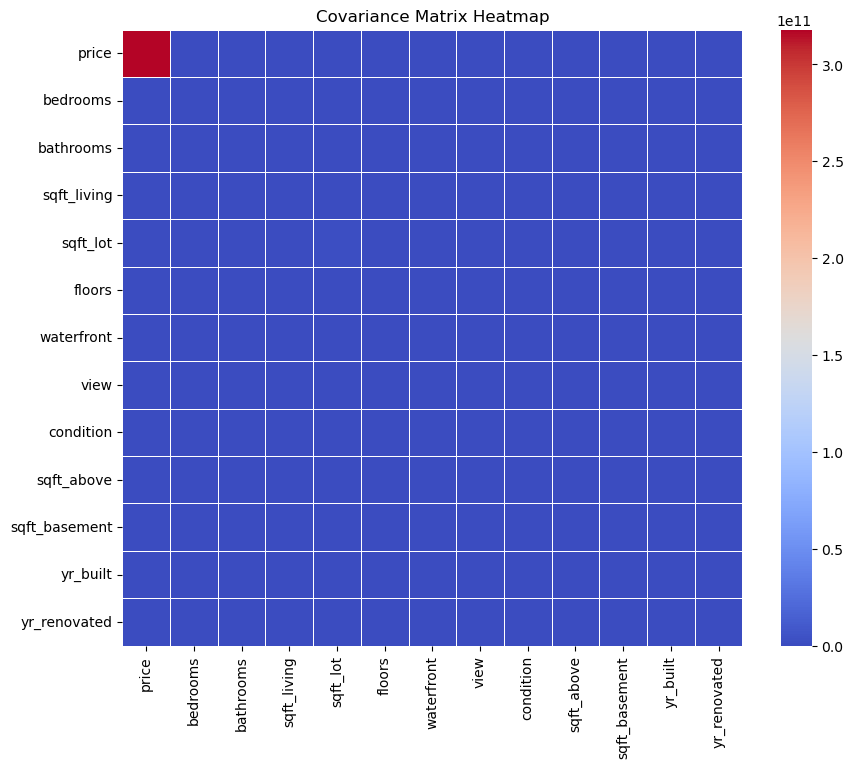

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()